# **Simple Linear Regression Model**

# **Step 1: Understanding the Dataset**

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('tips.csv')

print(data.head())

print(data.isnull().sum())

data.describe()


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['day'] = le.fit_transform(data['day'])
data['time'] = le.fit_transform(data['time'])

print(data)

     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    2     0     2
1         10.34  1.66    1       0    2     0     3
2         21.01  3.50    1       0    2     0     3
3         23.68  3.31    1       0    2     0     2
4         24.59  3.61    0       0    2     0     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    1     0     3
240       27.18  2.00    0       1    1     0     2
241       22.67  2.00    1       1    1     0     2
242       17.82  1.75    1       0    1     0     2
243       18.78  3.00    0       0    3     0     2

[244 rows x 7 columns]


# **Step 2: Data Visualization**

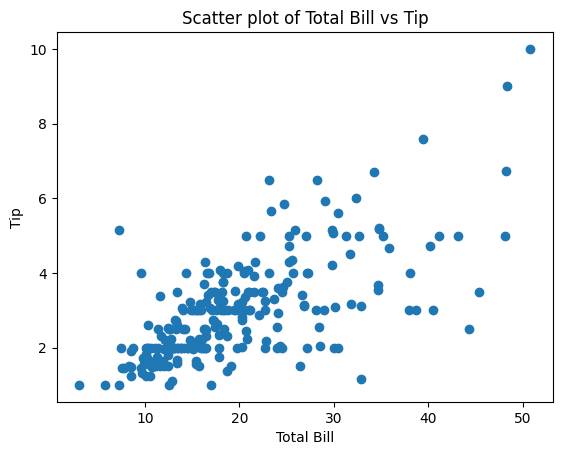

In [64]:

plt.scatter(data['total_bill'], data['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter plot of Total Bill vs Tip')
plt.show()


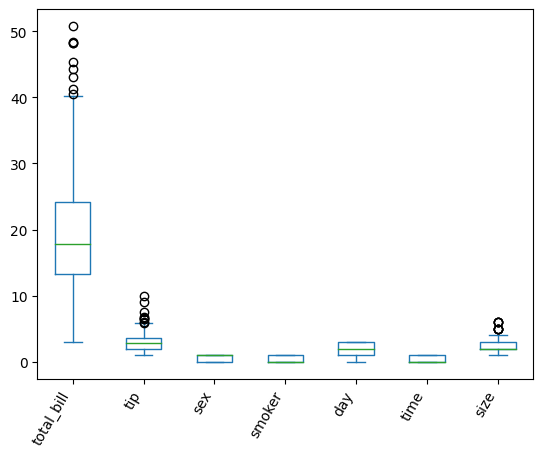

In [65]:

data.plot.box()
plt.xticks(rotation=60, ha='right');

<Axes: >

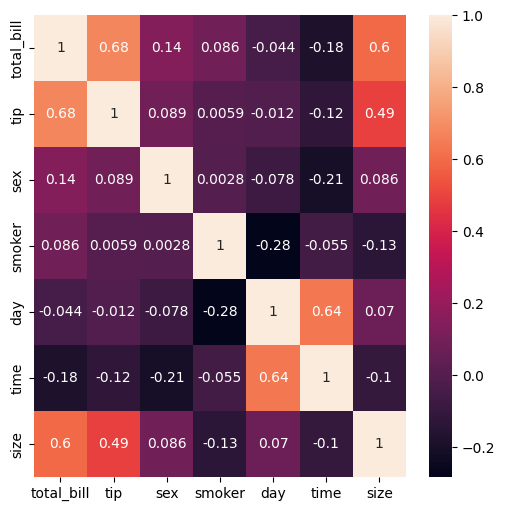

In [66]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data.corr(), annot=True, ax=ax)

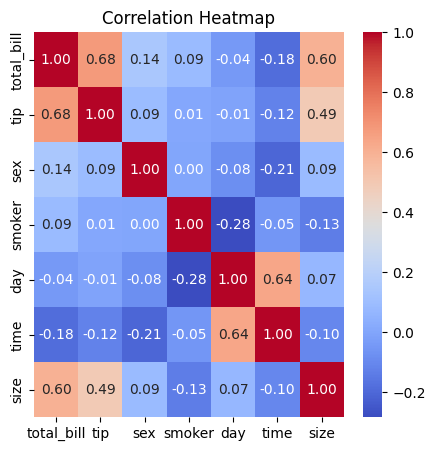

In [67]:
plt.figure(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='total_bill', ylabel='smoker'>

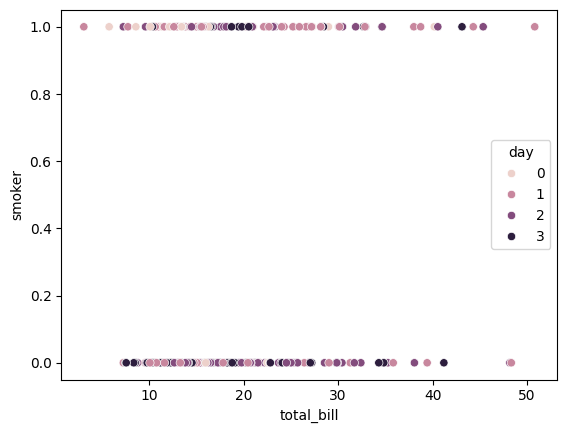

In [68]:
sns.scatterplot(data=data, x='total_bill', y='smoker', hue='day')

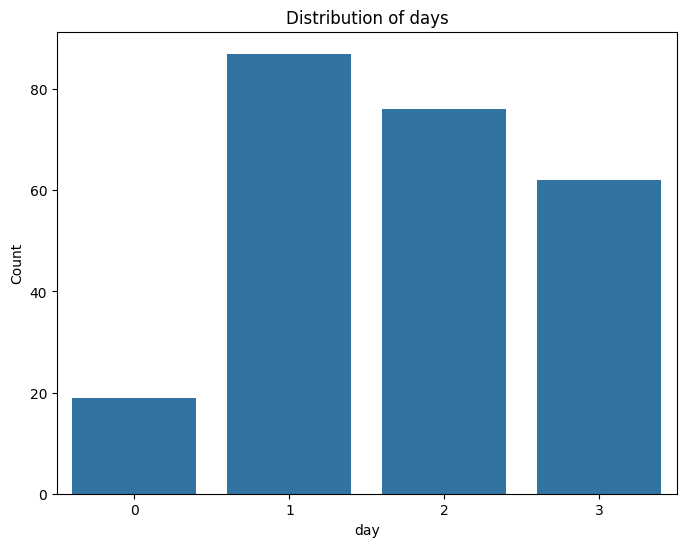

In [69]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='day', data=data)
plt.title('Distribution of days')
plt.xlabel('day')
plt.ylabel('Count')
plt.show()

# **Step 3: Model Building and Evaluation**

Mean Squared Error: 0.5688142529229536
R-squared: 0.5449381659234664


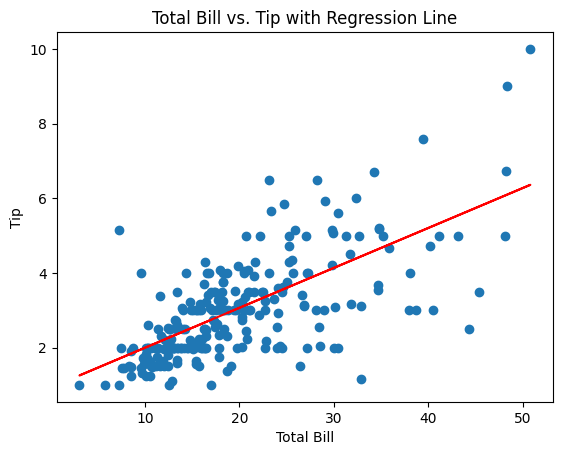

In [70]:
X = data[["total_bill"]]
y = data["tip"]

X_train, X_test, y_train, y_test = train_test_split(data[["total_bill"]], y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color="red")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs. Tip with Regression Line")
plt.show()

In [71]:
def predict_tip(total_bill):
    tip_pred = model.predict(pd.DataFrame([[total_bill]], columns=['total_bill']))
    return tip_pred[0]

user_input = float(input("Enter the total bill amount: "))
predicted_tip = predict_tip(user_input)
print(f"The predicted tip for a total bill of ${user_input} is ${predicted_tip:.2f}")

Enter the total bill amount: 18.78
The predicted tip for a total bill of $18.78 is $2.93
